# Examples of graphs to show results

This notebook shows examples of how DYNAMICAL results can be visualized. DYNAMICAL only handles electricity tracking and LCA impacts computation. Graph functionalities are not implemented in DYNAMICAL.

In [4]:
from dynamical.easy_use import execute # Import the execution function

import pandas
from numpy import unique
import matplotlib.pyplot as plt # Not included in package requirements

In [2]:
impacts = execute(config='Spreadsheet_test.xlsx') # Compute electricity tracking and impacts

## Group per country

In [9]:
def compute_per_country(results):
    """Function to group results per country"""
    countries = unique([c.split("_")[-1] for c in results.columns]) # List of countries
    
    per_country = []
    for c in countries:
        cols = [k for k in results.columns if k[-3:]==f"_{c}"]
        per_country.append(pandas.Series(results.loc[:,cols].sum(axis=1), name=c))
        
    return pandas.concat(per_country,axis=1)

In [11]:
gwp_per_country = compute_per_country(impacts['GWP']) # Group GWP impacts per country

['AT' 'CH' 'DE' 'FR' 'IT' 'Other']


<AxesSubplot:>

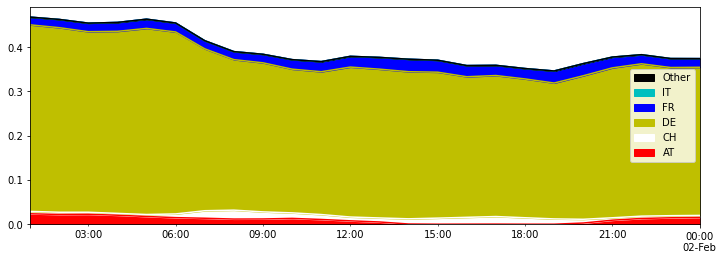

In [17]:
gwp_per_country.plot.area(figsize=(12,4), legend='reverse', color=['r','w','y','b','c','k'])

## Group per production type

In [18]:
def compute_per_type(results):
    """Function to group datasets per type of unit, regardless of the country of origin"""
    unit_list = unique([k[:-3] for k in results.columns]) # List the different production units
    
    per_unit = []
    for u in unit_list:
        cols = [k for k in results.columns if k[:-3]==u] # collect the useful columns
        per_unit.append(pandas.Series(results.loc[:,cols].sum(axis=1), name=u)) # aggregate

    return pandas.concat(per_unit,axis=1)

In [19]:
es13_per_type = compute_per_type(impacts['ES2013']) # Group GWP impacts per country

<AxesSubplot:>

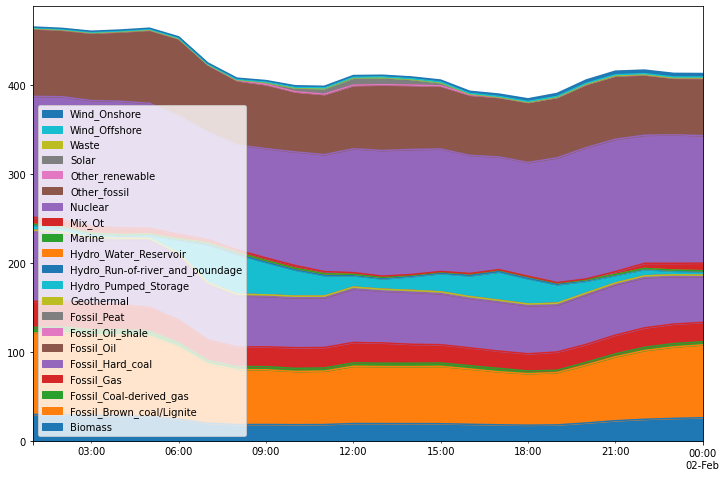

In [21]:
es13_per_type.plot.area(figsize=(12,8), legend='reverse')